In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data_file_path = "../../data/Iris.csv"
data_df = pd.read_csv(data_file_path)
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
category_set = set(data_df['Species'])
category_set

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [4]:
category_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
data_df['label'] = data_df['Species'].apply(lambda x: category_mapping[x])
data_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
X = data_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
Y = data_df['label']
Y = np.array(Y, ndmin=0)
Y[0]

0

In [8]:
# scalar = StandardScaler()
# scalar.fit(X)
# X = scalar.transform(X)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.4, random_state = 42)
print(len(xtrain), len(xtest), len(ytrain), len(ytest))
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

90 60 90 60
(90, 4) (60, 4) (90,) (60,)


In [10]:
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
ypredict = classifier.predict(xtest)

In [11]:
accuracy_score(ytest, ypredict)

0.9666666666666667

In [14]:
def sigmoid(x):
    return (1/(1+ np.exp(-x)))
# sigmoid(np.array([0, 1]))

def hypothesis(X,w):
    thetaX = np.matmul(X,w)
    return sigmoid(thetaX)


In [40]:
xtranspose = xtrain.transpose()
# xtranspose.shape
training_samples = len(xtrain)
testing_samples = len(xtest)

In [41]:
def logCost(X,y, w):
    """
    X : m*n
    y : m*1
    w : n*1
    """
    cost1 = float(np.dot(y, np.log(hypothesis(X,w))))/training_samples
    cost2 = float(np.dot(1-y, np.log(1 - hypothesis(X,w))))/training_samples
    cost = - (cost1 + cost2)
    return cost

In [42]:
def solve(yList, label):
    temp = []
    for i in yList:
        if i == label:
            temp.append(1)
        else:
            temp.append(0)
    return temp
y0 = solve(ytrain, 0)
y1 = solve(ytrain, 1)
y2 = solve(ytrain, 2)
yArr = np.array([y0, y1, y2],ndmin= 2 )
# print(yArr[0])
# print(yArr[1])
# print(yArr[2])
# ytrain

In [39]:
print(xtrain.shape)
print(ytrain.shape)
print(w.shape)
print(xtranspose.shape)

(90, 4)
(90,)
(3, 4)
(4, 90)


In [89]:
w = np.zeros(shape=(3,4))
epochs = 10000
learning_rate = 0.1
cost_list = [[] for i in range(3)]
for i in range(3):
    for item in range(epochs):
        temp = hypothesis(xtrain,w[i]) - yArr[i]
        temp = np.matmul(xtranspose, temp)
    #     print('derivative:', temp, temp.shape)
#         print(temp)
        w[i] = w[i] - learning_rate*(temp/training_samples)
    #     print('weights:',w,w.shape)
        cost_list[i].append(logCost(xtrain,yArr[i], w[i]))
    #     print('cost', cost_list[0])

In [90]:
import matplotlib.pyplot as plt

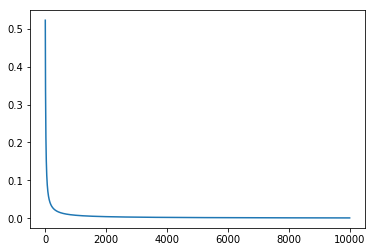

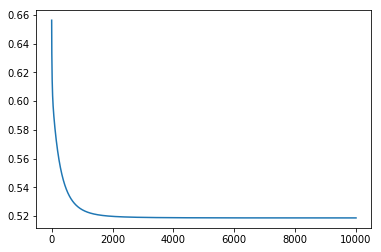

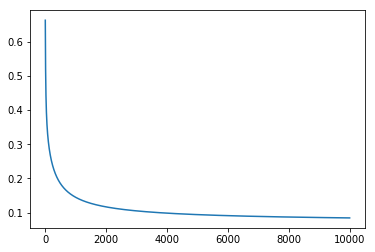

In [91]:
for i in range(3):
    plt.plot([j+1 for j in range(epochs)], cost_list[i])
    plt.show()

In [95]:
print(xtest.shape)
wtranspose = w.transpose()
print(wtranspose.shape)

(60, 4)
(4, 3)


In [107]:
temp = np.matmul(xtest, wtranspose)
ypredict= np.argmax(temp, axis = 1)
ypredict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [108]:
ytest

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [109]:
accuracy_score(ytest, ypredict)

0.9666666666666667